# Olympic Dataset Exploratory Data Analysis (EDA)

## Importing Required Libraries

In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



## Loading the Dataset

In [2]:
# Load the Olympic dataset from the CSV file into a Pandas DataFrame
data = pd.read_csv("C:/Users/DEEPANSHI/Downloads/dataset_olympics.csv")


## Viewing the First Few Records

In [3]:
# Display first 5 rows of the dataset to understand its structure
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


 ## Initial Data Exploration

In [4]:
# Get a concise summary of the DataFrame including data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [5]:
# Generate descriptive statistics of numerical columns like mean, std, min, max, and quartiles
data.describe()


,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [6]:
# Generate descriptive statistics for categorical (object) columns, such as count, unique values, top frequent value, and frequency
data.describe(include=["object"])


,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,9690
unique,35556,2,827,226,51,2,42,65,744,3
top,Oksana Aleksandrovna Chusovitina,M,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,29,51877,4979,5216,3675,58467,6034,10629,1738,3292


 ## Handling Missing and Duplicate Values

In [7]:
# Check for missing values in each column by summing up the number of NaNs
data.isna().sum()


ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [8]:
# Count the number of duplicate rows in the dataset
data.duplicated().sum()

np.int64(383)

In [9]:
# Remove duplicate rows from the dataset in-place to clean the data
data.drop_duplicates(inplace=True)


## Gender Distribution of Athletes


In [10]:
data.value_counts

<bound method DataFrame.value_counts of           ID                            Name Sex   Age  Height  Weight  \
0          1                       A Dijiang   M  24.0   180.0    80.0   
1          2                        A Lamusi   M  23.0   170.0    60.0   
2          3             Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3          4            Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4          5        Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...      ...                             ...  ..   ...     ...     ...   
69995  35656              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69996  35656              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69997  35657  David Thomas "Dave" Fitzsimons   M  26.0   170.0    65.0   
69998  35657  David Thomas "Dave" Fitzsimons   M  30.0   170.0    65.0   
69999  35658                    Marek Fiurek   M  23.0   180.0    68.0   

                 Team  NOC        Games  Year  Season       City  \
0  

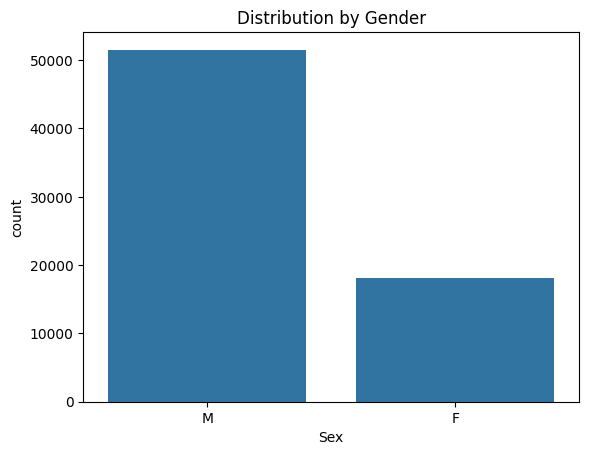

In [11]:
# Plot the distribution of athletes by gender using a count plot
sns.countplot(data=data, x="Sex")
plt.title("Distribution by Gender")
plt.show()

## Age Distribution of Athletes

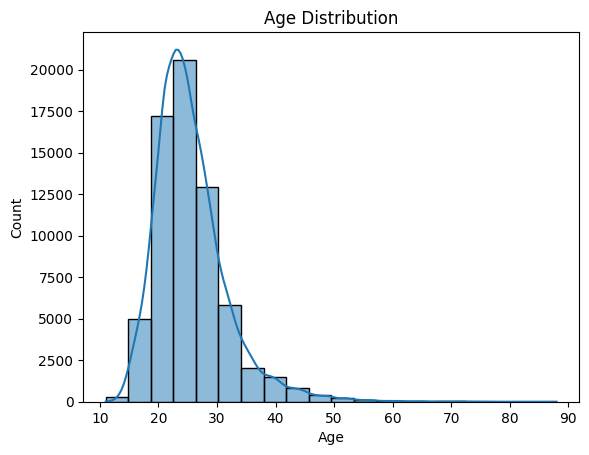

In [12]:
# Plot histogram of athlete ages with KDE curve to visualize age distribution
sns.histplot(data=data, x="Age", bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


In [13]:
# Medal Distribution Over the Years

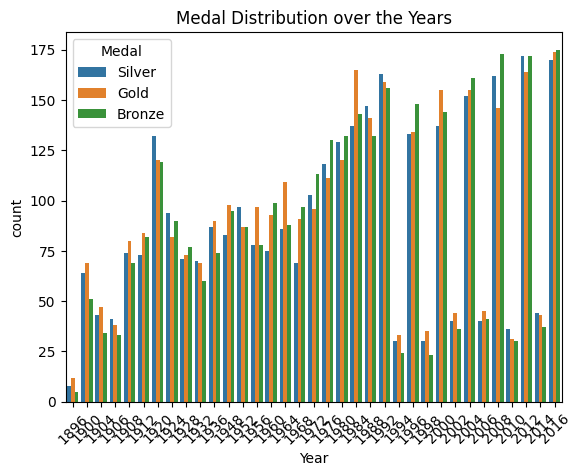

In [14]:
# Count the number of medals won each year, separated by medal type, with x-axis labels rotated for readability
sns.countplot(data=data, x="Year", hue="Medal")
plt.title("Medal Distribution over the Years")
plt.xticks(rotation=45)
plt.show()


In [15]:
#Average Age of Athletes by Year

In [16]:
# Calculate the average age of athletes for each Olympic year and print the results
year_avg_age = data.groupby("Year")["Age"].mean()
print(year_avg_age)

Year
1896    23.029412
1900    29.119883
1904    27.063241
1906    26.989474
1908    27.000000
1912    27.965552
1920    29.241135
1924    28.252267
1928    27.973564
1932    29.606987
1936    27.245665
1948    28.363170
1952    26.273684
1956    26.316156
1960    25.136156
1964    24.852107
1968    24.316722
1972    24.126448
1976    23.656820
1980    23.312364
1984    24.060328
1988    24.257374
1992    24.637827
1994    24.487516
1996    25.338210
1998    25.143860
2000    25.435177
2002    26.029095
2004    25.780111
2006    26.091716
2008    25.685148
2010    26.150776
2012    25.993485
2014    26.082814
2016    26.259592
Name: Age, dtype: float64


## Median Height by Sport

In [17]:
# Calculate the median height for each sport and print the maximum median height across all sports
sport_median_height = data.groupby("Sport")["Height"].median()
print(sport_median_height.max())


190.0


In [18]:
# Filter and display sports where the median athlete height is exactly 190 cm
sport_median_height[sport_median_height == 190.0]

Sport
Basketball    190.0
Name: Height, dtype: float64

In [19]:

# Calculate the median height for each sport and print the minimum median height among all sports
sport_median_height = data.groupby("Sport")["Height"].median()
print(sport_median_height.min())


164.0


In [20]:
# Filter and display sports where the median athlete height is exactly 164 cm
sport_median_height[sport_median_height == 164.0]


Sport
Gymnastics    164.0
Name: Height, dtype: float64

## Participant Count by Country and Gender

In [21]:
# Count the number of athletes grouped by country (NOC) and gender (Sex), then print the results
country_gender_count = data.groupby(["NOC", "Sex"])["ID"].count()
print(country_gender_count)


NOC  Sex
AFG  M       38
AHO  F        6
     M       27
ALB  F        4
     M        7
           ... 
YUG  M      455
ZAM  F        3
     M       40
ZIM  F       41
     M       47
Name: ID, Length: 432, dtype: int64


 ## Gold Medal Count by Country

In [22]:
# Count the number of gold medals won by each country (NOC) and print the counts
country_gold_medals = data[data["Medal"] == "Gold"].groupby("NOC")["Medal"].count()
print(country_gold_medals)


NOC
ALG      1
ANZ      7
ARG     25
ARM      1
AUS     98
      ... 
URU     13
USA    747
UZB      4
YUG     31
ZIM      7
Name: Medal, Length: 84, dtype: int64


In [23]:
# Find and print the maximum number of gold medals won by a single country (NOC)
country_gold_medals = data[data["Medal"] == "Gold"].groupby("NOC")["Medal"].count()
print(country_gold_medals.max())


747


In [24]:
# Display the country (or countries) that won exactly 747 gold medals
country_gold_medals[country_gold_medals == 747]


NOC
USA    747
Name: Medal, dtype: int64

## Average Weight by Sport and Gender

In [25]:
# Calculate the average weight of athletes grouped by sport and gender, then print the results
sport_gender_avg_weight = data.groupby(["Sport", "Sex"])["Weight"].mean()
print(sport_gender_avg_weight)


Sport          Sex
Alpine Skiing  F      62.154589
               M      77.725309
Alpinism       F            NaN
               M            NaN
Archery        F      61.023256
                        ...    
Water Polo     M      87.584973
Weightlifting  F      66.189474
               M      79.927852
Wrestling      F      58.169014
               M      77.256240
Name: Weight, Length: 114, dtype: float64


## Number of Unique Events per Sport

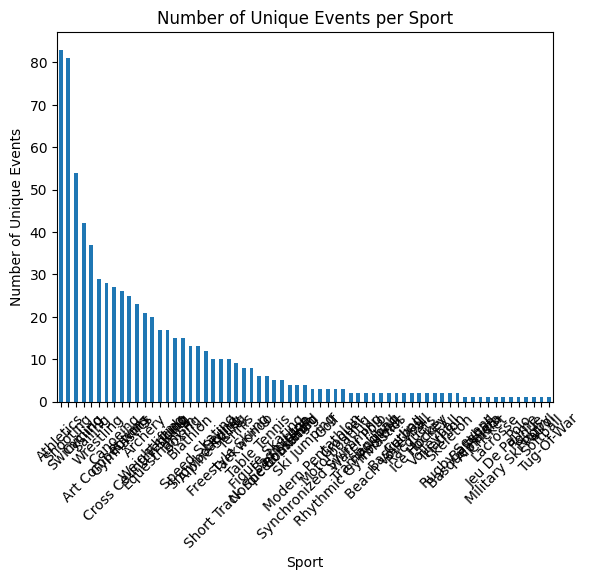

In [26]:
# Group data by 'Sport' and count unique 'Event's, then sort in descending order
sport_event_count = data.groupby("Sport")["Event"].nunique().sort_values(ascending=False)

# Plot the counts as a bar chart
sport_event_count.plot(kind="bar")

# Set the title of the plot
plt.title("Number of Unique Events per Sport")

# Label the x-axis
plt.xlabel("Sport")

# Label the y-axis
plt.ylabel("Number of Unique Events")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


## Number of Participants Over the Years

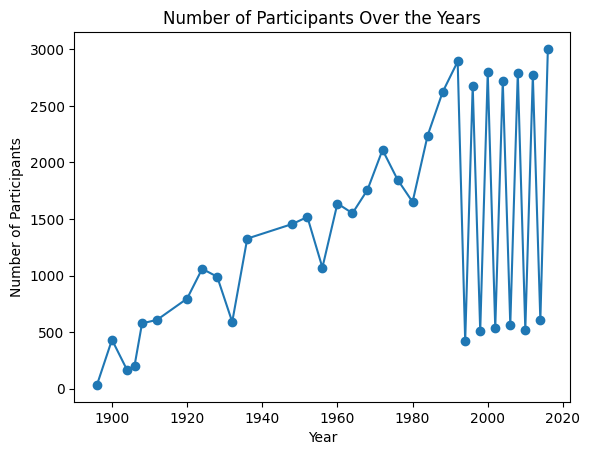

In [27]:
# Group data by 'Year' and count unique participants by their 'ID'
year_participant_count = data.groupby("Year")["ID"].nunique()

# Plot the participant count over the years as a line plot with circle markers
year_participant_count.plot(kind="line", marker="o")

# Set the title of the plot
plt.title("Number of Participants Over the Years")

# Label the x-axis
plt.xlabel("Year")

# Label the y-axis
plt.ylabel("Number of Participants")

# Display the plot
plt.show()



# Top 10 Countries with Highest Average Age

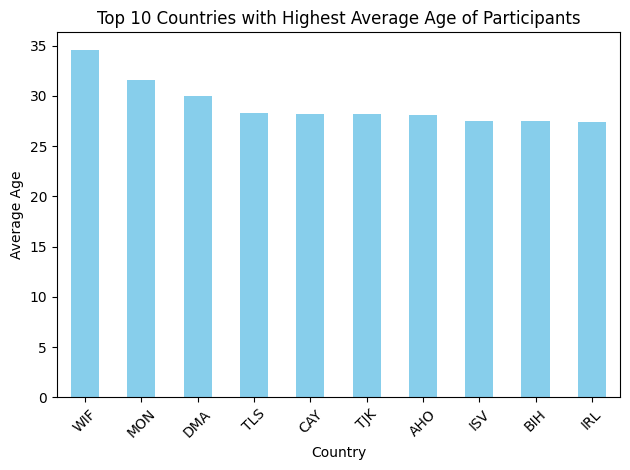

In [28]:
# Group data by 'NOC' (country code) and calculate the average age of participants
country_avg_age = data.groupby("NOC")["Age"].mean().sort_values(ascending=False)

# Plot the top 10 countries with highest average age as a bar chart with skyblue color
country_avg_age.head(10).plot(kind="bar", color="skyblue")

# Set the title of the plot
plt.title("Top 10 Countries with Highest Average Age of Participants")

# Label the x-axis
plt.xlabel("Country")

# Label the y-axis
plt.ylabel("Average Age")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


## Top 10 Countries with Lowest Average Age

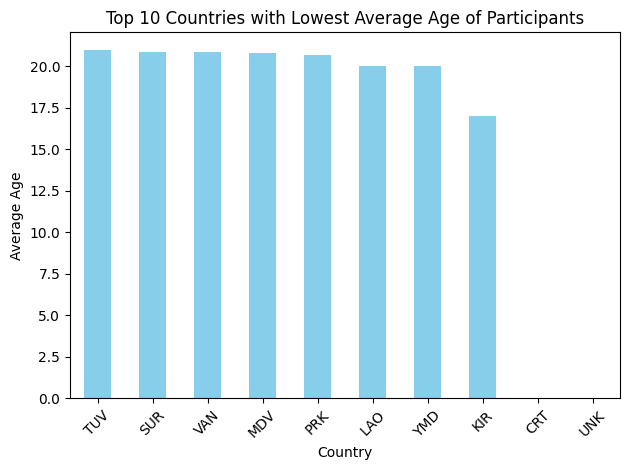

In [29]:
# Group data by 'NOC' (country code) and calculate the average age of participants
country_avg_age = data.groupby("NOC")["Age"].mean().sort_values(ascending=False)

# Plot the bottom 10 countries with lowest average age as a bar chart with skyblue color
country_avg_age.tail(10).plot(kind="bar", color="skyblue")

# Set the title of the plot
plt.title("Top 10 Countries with Lowest Average Age of Participants")

# Label the x-axis
plt.xlabel("Country")

# Label the y-axis
plt.ylabel("Average Age")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


##  Age Distribution by Season

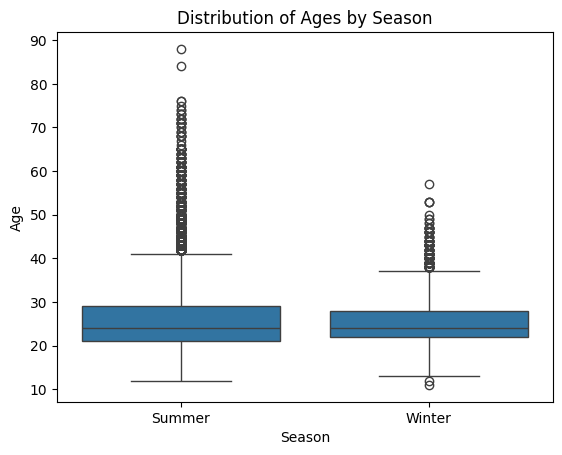

In [30]:
# Create a boxplot to show the distribution of athletes' ages by Season (Summer/Winter)
sns.boxplot(data=data, x="Season", y="Age")

# Set the title of the plot
plt.title("Distribution of Ages by Season")

# Label the x-axis
plt.xlabel("Season")

# Label the y-axis
plt.ylabel("Age")

# Show the plot
plt.show()


## Distribution of Heights by Medal - Violin Plot

C:\Users\DEEPANSHI\AppData\Local\Temp\ipykernel_35368\4106845046.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_cleaned, x="Medal", y="Height", palette="Set2")


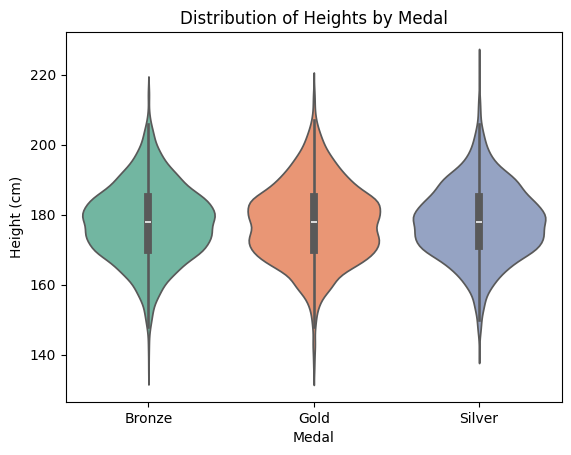

In [31]:

# Drop rows where Medal or Height is missing
data_cleaned = data.dropna(subset=["Medal", "Height"])

# Create violin plot
sns.violinplot(data=data_cleaned, x="Medal", y="Height", palette="Set2")

# Set title and labels
plt.title("Distribution of Heights by Medal")
plt.xlabel("Medal")
plt.ylabel("Height (cm)")

# Display the plot
plt.show()


## Country with the Most Medals

In [32]:
# Find the country with the highest number of medals by counting 'NOC' occurrences and getting the country with max count
most_medals_county = data["NOC"].value_counts().idxmax()
print("Most Medal Winning Country: ", most_medals_county)

Most Medal Winning Country:  USA


## Athlete Height vs Weight by Medal Status

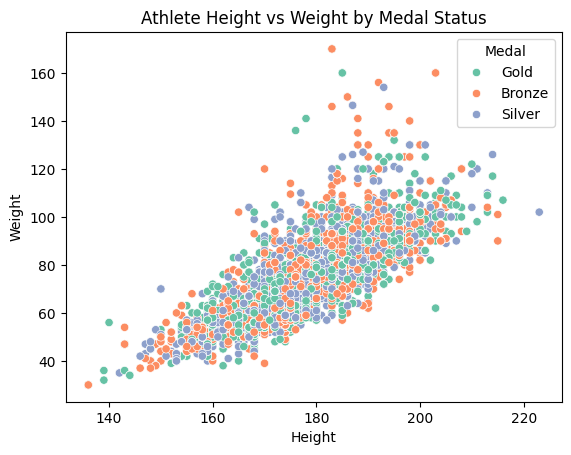

In [33]:
# # Scatterplot of Athlete Height vs Weight by Medal Status

sns.scatterplot(data=data, x="Height", y="Weight", hue="Medal", palette="Set2")
plt.title("Athlete Height vs Weight by Medal Status")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(title="Medal")
plt.show()

## Heatmap: Medal Counts by Country and Year

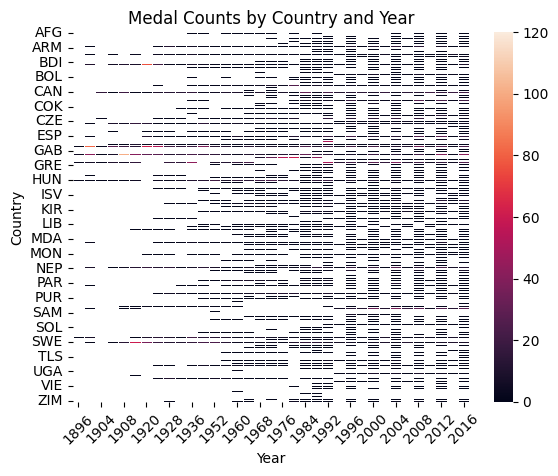

In [34]:
# Create a pivot table with countries as rows, years as columns, and count of medals as values
medals_by_country_year = data.pivot_table(index="NOC", columns="Year", values="Medal", aggfunc="count")

# Plot a heatmap of the medal counts across countries and years
sns.heatmap(medals_by_country_year, linewidths=0.5)

# Set the title of the plot
plt.title("Medal Counts by Country and Year")

# Label the x-axis as 'Year'
plt.xlabel("Year")

# Label the y-axis as 'Country'
plt.ylabel("Country")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()



## Summary of Findings

- The dataset contains athlete information including age, height, weight, sport, medals, and countries.
- The majority of participants are male.
- The average age of participants has shown a gradual increase over the years.
- USA is the most medal-winning country.
- Basketball has the tallest athletes with a median height of 190 cm.
- The number of participants has generally increased over the years.
- Medal distributions vary significantly across different Olympic years.
- Weight differences are noticeable between male and female athletes in various sports.
